In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display, HTML
from ydata_profiling import ProfileReport

C:\Users\Aizad\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Set display width for better visualization

In [13]:
display(HTML("<style>.container { width:80% !important; }</style>"))

In this section you should extract some information about the [Football Events](https://www.kaggle.com/datasets/secareanualin/football-events?select=events.csv) dataset.<br>
1. Your plots must be informative.anyone who looks at your plot must understand it without knowing the code behind it.use label, title, legend,... in your plots to do so.
2. You must not use for/while loops in this section.
3. Writing the answer in markdown in the notebook has extra points. 


## Q0. Import the datasets
1. import the datasets into pandas.DataFrame objects.
2. get some insight about the dataset(use head, dtypes,colmns, ...)
the more you do in this part the better.


In [14]:
events = pd.read_csv ('datasets/events.csv')
ginf = pd.read_csv('datasets/ginf.csv')

### get some insights about data sets via Profile report for each datasets.
the Html file of profile reports are accessible in datasets folder


In [8]:
ProfileReport(events, title = 'events data about each game profile report').to_file('datasets/events.html')
ProfileReport(ginf, title = 'metadata and market odds about each game profile report').to_file('datasets/ginf.html')

Summarize dataset:  80%|████████████████████████████       | 20/25 [00:00<00:00, 23.15it/s, Calculate auto correlation]C:\Users\Aizad\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.35it/s]


## Q1. Delete the rows without detailed event data. 

>first visualize them 

In [15]:
ginf.loc[ginf['adv_stats']== False]

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
19,4nHmUALb/,/soccer/england/premier-league-2011-2012/fulha...,False,2011-08-13,E0,2012,england,Fulham,Aston Villa,0,0,1.95,3.65,4.51,NaN,NaN,NaN,NaN
20,4WY4SljB/,/soccer/england/premier-league-2011-2012/newca...,False,2011-08-13,E0,2012,england,Newcastle,Arsenal,0,0,3.60,3.55,2.25,NaN,NaN,NaN,NaN
21,bgY8R85H/,/soccer/england/premier-league-2011-2012/qpr-b...,False,2011-08-13,E0,2012,england,QPR,Bolton,0,4,2.20,3.35,4.09,NaN,NaN,NaN,NaN
26,EkQZqjLo/,/soccer/england/premier-league-2011-2012/wigan...,False,2011-08-13,E0,2012,england,Wigan,Norwich City,1,1,2.50,3.52,3.15,NaN,NaN,NaN,NaN
30,nB6hTUz5/,/soccer/england/premier-league-2011-2012/liver...,False,2011-08-13,E0,2012,england,Liverpool,Sunderland,1,1,1.45,4.75,10.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,MXkDcOQC/,/soccer/england/premier-league-2013-2014/aston...,False,2013-09-28,E0,2014,england,Aston Villa,Manchester City,3,2,8.40,4.47,1.57,NaN,NaN,NaN,NaN
3959,SUxaLRIJ/,/soccer/england/premier-league-2013-2014/hull-...,False,2013-09-28,E0,2014,england,Hull,West Ham,1,0,2.50,3.30,3.80,NaN,NaN,NaN,NaN
3968,KSHwEqBg/,/soccer/england/premier-league-2013-2014/sunde...,False,2013-09-29,E0,2014,england,Sunderland,Liverpool,1,3,6.30,4.30,1.70,NaN,NaN,NaN,NaN
3970,Q5IZEPem/,/soccer/england/premier-league-2013-2014/stoke...,False,2013-09-29,E0,2014,england,Stoke City,Norwich City,0,1,2.05,3.50,4.75,NaN,NaN,NaN,NaN


>then delete them 

In [16]:
ginf.query('adv_stats', inplace=True)

>now the column 'adv_stats' is redundent and its better to delete this column

In [17]:
del ginf['adv_stats']

## Q2. Extract the top most eventfull games
1. Write a function that returns the top n most eventfull games as pandas.DataFrame
2. plot the 10 top games using the function above with a <b>horizontal bar chart</b>.<br>
<b>be carefull not to use game-id's in the plot, use their name.</b>
    
    

In [22]:
def n_most_eventfull_games (n):  
    
    df = events.value_counts('id_odsp').nlargest(n).reset_index()
    df.columns = ['id_odsp', 'count']
    df = df.merge(ginf[['id_odsp', 'ht', 'at']], on ='id_odsp')
    df ['games'] = df['ht'] + ' Vs ' + df['at']
    return df[['games','count']]


top10_eventfull_games = n_most_eventfull_games(10)

>now plot the top10 most eventfull games in the format of each game {home vs away} and its frequency  

<AxesSubplot: ylabel='games'>

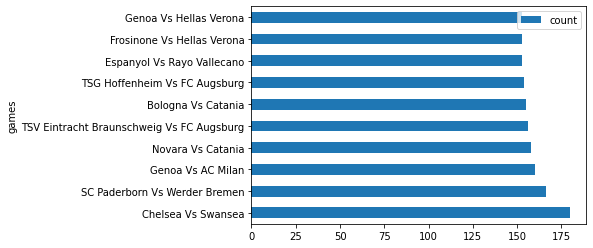

In [23]:
top10_eventfull_games.plot.barh(x='games', y='count')

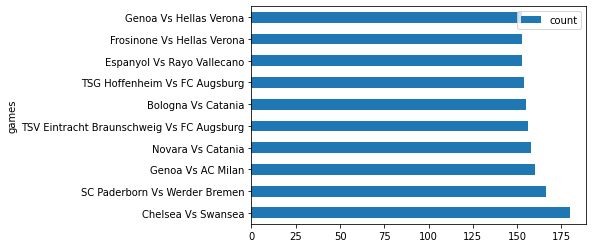 

## Q3. What are the most frequent events?
1. Write a function that returns the n most frequent events as pandas.DataFrame
2. plot the 5 most frequent events  using the function above with a <b>Pie chart</b>.<br>

In [24]:
def n_most_frequent_events (n):
    df = events.value_counts('id_event').nlargest(n).reset_index()
    df.columns = ['id_event', 'count']
    return df

top5_frequent_events = n_most_frequent_events(5)

> now plot top 5 frequent events via <b>pie chart<b>.

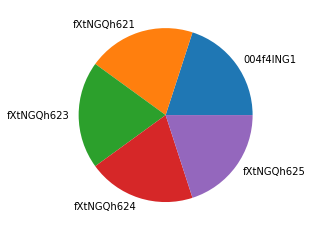

In [25]:
id_events = list(top5_frequent_events['id_event'])
count = list(top5_frequent_events['count'])


plt.pie(count, labels=id_events ) 
plt.show()

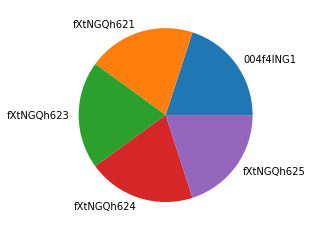

## Q4. Find the distribution of the time each goal is scored.
In this part we want to notice that on which times during a game the goals are scored.(use histogram)

>create a new dataframe with relevant columns <br> then plot goal-time distirbution

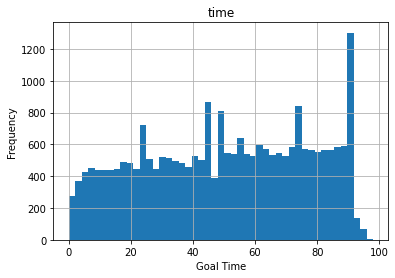

In [26]:
goals = events.loc[events['is_goal'] == True , ['time']]

# create a histogram of goal times with 48 bins with average of game lenght 94 min this distribution bins are nearly 2 min 
goals.hist(bins= 47)
plt.xlabel('Goal Time')
plt.ylabel('Frequency')
plt.show()

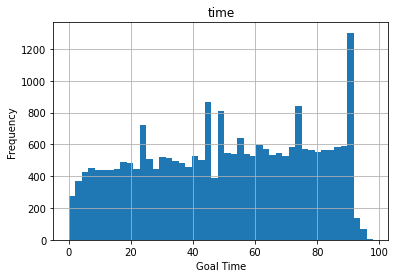

## Q5. shots outcome
 We want to create a DataFrame containing the total number of (1-On target, 2-Off target, 3-Blocked, 4-Hit the post)shot outcomes for four quarters of a game. You must create a 4-row and 4-column DataFrame for shot outcomes and the time they happend.<br>
### Four quarters:
1. 0 to 25
2. 25 to 45
3. 45 to 70
4. 70 to ...

In [27]:
quarter_bins = [0, 25, 45, 70, float('inf')]
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']


df = events.loc[:,['shot_outcome','time']]
df['quarter'] = pd.cut(df['time'], bins=quarter_bins, labels=quarter_labels)


shot_outcome_table = pd.pivot_table(df, index='quarter', columns='shot_outcome', aggfunc='size', fill_value=0)
shot_outcome_table

shot_outcome,1.0,2.0,3.0,4.0
quarter,,,,
Q1,17994,22518,12615,770
Q2,16830,20603,12270,816
Q3,21578,25368,14974,970
Q4,21598,24323,14217,1019


## Q6. Find the mean of events in diffrent years
 

>1. We want to create a DataFrame containing the average of **event_type** for diffrent years.The dataframe must have 11 rows for each event_type.

In [28]:
df = events[['id_odsp','id_event' ,'event_type']]
df = df.merge(ginf[['id_odsp', 'season']], on ='id_odsp').groupby(['season','event_type','id_odsp']).size().reset_index(name='count')
df = df.groupby(['event_type', 'season'])['count'].mean().reset_index(name='avg_CPM')

events_avg_cpm = df.pivot(index='event_type', columns='season', values='avg_CPM')

>2. plot the result in a way that you think is more informative.


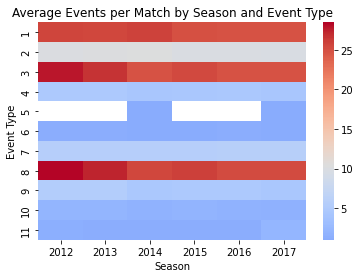

In [29]:
# plot the heatmap with a diverging color map
sns.heatmap(events_avg_cpm, cmap='coolwarm', center=events_avg_cpm.mean().mean(),)

plt.title('Average Events per Match by Season and Event Type')
plt.xlabel('Season')
plt.ylabel('Event Type')
plt.show()

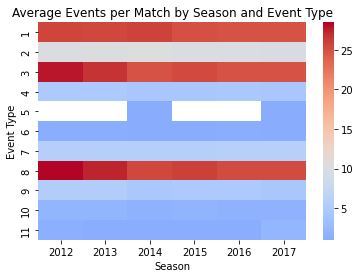

## Q7. Most-scoring leages
Sort the leages by the average of scores in a season.

In [30]:
# 20*19=380 for 20teams leagues and 18*17=306 for 18teams league
matches_per_season = {'D1': 306, 'E0': 380, 'SP1': 380, 'F1': 380, 'I1': 380} 

#SPM is abbrv of scores per match
df = ginf.groupby(['league', 'season'])[['fthg', 'ftag']].sum().sum(axis=1).reset_index(name='scores')
df['avg_spm'] = df['scores'] / df['league'].map(matches_per_season)
df = df.loc[:, df.columns != 'scores'].groupby(['league', 'season']).mean().reset_index()
df.sort_values(['avg_spm','season'], ascending=[False,True], inplace = True, ignore_index=True,)

leagues_avg_spm = df
leagues_avg_spm

,league,season,avg_spm
0,D1,2013,2.921569
1,SP1,2013,2.871053
2,D1,2016,2.839869
3,D1,2014,2.807190
4,D1,2015,2.761438
5,SP1,2014,2.750000
6,SP1,2016,2.744737
7,D1,2012,2.732026
8,I1,2014,2.723684
9,E0,2016,2.700000


## Q8. Find the games that the away team won by 3 or more goal diffrence.

In [31]:
ginf['three_goal_margin'] = (ginf['ftag'] - ginf['fthg']) >= 3

ginf[ginf['three_goal_margin'] == True]

,id_odsp,link_odsp,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n,three_goal_margin
9,Wn69eU5B/,/soccer/germany/bundesliga-2011-2012/koln-wolf...,2011-08-06,D1,2012,germany,FC Cologne,VfL Wolfsburg,0,3,3.00,3.80,2.54,NaN,NaN,NaN,NaN,True
16,fLN0n0XO/,/soccer/france/ligue-1-2011-2012/dijon-rennes-...,2011-08-07,F1,2012,france,Dijon FCO,Stade Rennes,1,5,3.35,3.27,2.50,NaN,NaN,NaN,NaN,True
84,htFsNcAR/,/soccer/germany/bundesliga-2011-2012/kaisersla...,2011-08-27,D1,2012,germany,Kaiserslautern,Bayern Munich,0,3,7.60,4.70,1.52,NaN,NaN,NaN,NaN,True
102,C88uY13B/,/soccer/spain/primera-division-2011-2012/zarag...,2011-08-28,SP1,2012,spain,Real Zaragoza,Real Madrid,0,6,12.33,6.20,1.30,NaN,NaN,NaN,NaN,True
115,jLzeUf2l/,/soccer/germany/bundesliga-2011-2012/augsburg-...,2011-09-09,D1,2012,germany,FC Augsburg,Bayer Leverkusen,1,4,4.34,3.65,2.00,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10031,h0psEtTT/,/soccer/england/premier-league/swansea-arsenal...,2017-01-14,E0,2017,england,Swansea,Arsenal,0,4,7.40,5.25,1.53,1.61,2.58,1.71,2.26,True
10040,xEkyTc3G/,/soccer/england/premier-league/leicester-chels...,2017-01-14,E0,2017,england,Leicester City,Chelsea,0,3,5.10,3.70,1.85,2.10,1.89,1.95,1.95,True
10055,nqgcM0vD/,/soccer/france/ligue-1/marseille-monaco-nqgcM0vD/,2017-01-15,F1,2017,france,Marseille,AS Monaco,1,4,2.91,3.46,2.70,1.90,2.08,1.69,2.38,True
10079,nqu82nqe/,/soccer/italy/serie-a/chievo-fiorentina-nqu82nqe/,2017-01-21,I1,2017,italy,Chievo Verona,Fiorentina,0,3,3.90,3.38,2.20,2.40,1.71,2.01,1.88,True


## Q9. Find the two players with most event together. 



In [32]:
def n_player_with_most_event_togheter(n):
    # check for NaN values in player and player2 columns
    mask = events[['player', 'player2']].isna().any(axis=1)
    
    # clear previous data's exist in df
    df = pd.DataFrame()
    
    # apply map function only to non-NaN values if they differ from each other
    df['pair_count'] = events[~mask][['player', 'player2']].apply(lambda x: tuple(sorted(map(str, x))) if x[0] != x[1] else np.nan,axis=1)
    
    #return n most pair
    return df['pair_count'].value_counts().to_frame().head(n)


most_common_pair = n_player_with_most_event_togheter(10)
most_common_pair

,pair_count
"(lionel messi, neymar)",177
"(cristiano ronaldo, karim benzema)",162
"(lionel messi, luis suarez)",143
"(lorenzo insigne, marek hamsik)",137
"(dani alves, lionel messi)",129
"(cristiano ronaldo, marcelo)",125
"(cristiano ronaldo, luka modric)",104
"(german denis, maximiliano moralez)",100
"(andrepierre gignac, mathieu valbuena)",99
"(gonzalo castro, stefan kiessling)",98


## Q10. sort the players with most goals+assist

In [33]:
df = events.loc[(events['is_goal']==True) & (events['event_type2'] != 15), ['player','player2']]
df.columns =['scorer', 'assist']

goal_scorers_count = df['scorer'].value_counts()
assist_makers_count =  df['assist'].value_counts()

goal_assist_count = goal_scorers_count.add(assist_makers_count, fill_value=0).sort_values(ascending=False).to_frame()
goal_assist_count


,0
lionel messi,280.0
cristiano ronaldo,250.0
zlatan ibrahimovic,200.0
robert lewandowski,151.0
gonzalo higuain,146.0
...,...
francesco marianini,1.0
francesco della rocca,1.0
rafael marquez,1.0
rafael martins,1.0


## Q11.
 In this section we want to have a comparison between np built-in functions and pure python performance in terms of time.<br>
we have declared an abstract class named Base_compare which has two functions:
1. time_function:It gets the np.ndarray as input and do some function(for example sum function) on it and returns the time which took the system to run the function.
2. calculate:This function is a simple for loop(i from 1 to max_length with step=step) that builds a random np.ndarray with length=i then it calls time_function on the array.calculate function returns the length of each array and the time taken to do the function on the corresponding array in a pandas.DataFrame.

 1. Complete the time_functions in the two classes below.
  2. Initialize one object of each class.
  3. Run calculate function for the two objects you made.
  4. Concatenate the result into a single dataframe.
  5. Plot the dataframe.
  
  6. What do you understand from the figure.
  
 7. Why is there a bump in the times taken by system?(Extra points)  
   > The bump in the times taken by system is most likely due to the background processes running on the system at that time. 
 


 8. Why did we make the abstract function?and how could we do it better?(Extra points)  <br>
 >  We made the abstract function so that we can use it as a base class and create multiple other classes that inherit the time_function and calculate functions without needing to repeat the same code again and again. We could do it better by adding more abstract methods to the Base_compare class to make it truly abstract and enforce the implementation of these methods in the inherited classes, thereby making the code more modular and reusable.



In [16]:
from abc import abstractmethod
import timeit

class Base_model:
  
  def __init__(self,iteration=100,max_length=1000,step=10):
    self.iteration = iteration
    self.max_length = max_length
    self.step = step

  def calculate(self):
    data = []
    for i in range(1, self.max_length + 1, self.step):
      arr = np.random.rand(i)
      t = self.time_function(arr)
      data.append([i, t])
    return pd.DataFrame(data, columns=['Length', 'Time'])

  @abstractmethod
  def time_function(self,array):
    pass
 


In [17]:
class Np_bulitin_sum(Base_model):
  def __init__(self,iteration=100,max_length=1000,step=10):
    super().__init__(iteration=iteration,max_length=max_length,step=step)
  
  def time_function(self,array):
    return timeit.timeit(lambda: np.sum(array), number=self.iteration)/self.iteration


In [18]:
class Pure_python_sum(Base_model):

  def __init__(self,iteration=100,max_length=1000,step=10):
    super().__init__(iteration=iteration,max_length=max_length,step=step)
    
  def time_function(self,array):
    start = timeit.default_timer() # get current time
    sum = 0
    for i in array:
      sum += i
    end = timeit.default_timer() # end time
    return end - start # return time taken

<AxesSubplot: title={'center': 'Comparison between Numpy and Pure Python Time Functions'}, xlabel='Length'>

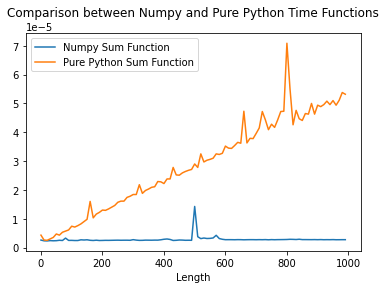

In [26]:
npf = Np_bulitin_sum()
ppf = Pure_python_sum()

df = pd.concat([npf.calculate(), ppf.calculate().iloc[:, 1]], axis=1)
df.columns = ['Length', 'Numpy Sum Function', 'Pure Python Sum Function']

df.plot(x='Length', y=['Numpy Sum Function', 'Pure Python Sum Function'], title='Comparison between Numpy and Pure Python Time Functions')


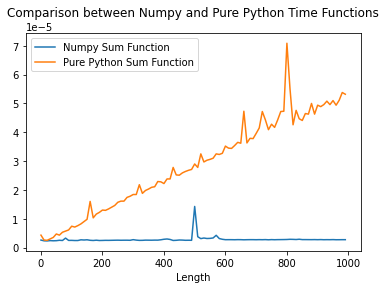